I have no idea which of these are actually being used as of right now

In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision.transforms import ToPILImage
from IPython.display import Image
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision

## Baby Test - Seeing if I can visualize an image

In [2]:
img = Image('/home/jeremy/Downloads/nhcd/numerals/0/001_01.jpg')

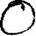

In [3]:
img

## PyTorch Test

Imports all the numeral data

In [4]:
data = ImageFolder(root='/home/jeremy/Downloads/nhcd/numerals/', transform=ToTensor())

How many images do we have?

In [5]:
len(data)

2880

Print the Tensor RBG representation of each image

In [6]:
for m in data:
    
    print(m)

(
(0 ,.,.) = 
  1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
  0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
  0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  0.9804  1.0000  ...   0.9961  0.9961  0.9961
  0.9843  1.0000  0.9529  ...   0.9961  0.9961  0.9961
  0.9255  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
  0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
  0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  0.9804  1.0000  ...   0.9961  0.9961  0.9961
  0.9843  1.0000  0.9529  ...   0.9961  0.9961  0.9961
  0.9255  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
  0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
  0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  0.9882  1.0000  0.9412  ...   1.0000  1.0000  1.0000
  0.9922  0.9294  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9647  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  0.9373  0.9686  0.9725  ...   0.9961  0.9961  1.0000
  0.9843  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  0.9843  0.9804  0.9922  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  0.9882  1.0000  0.9412  ...   1.0000  1.0000  1.0000
  0.9922  0.9294  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9647  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  0.9373  0.9686  0.9725  ...   0.9961  0.9961  1.0000
  0.9843  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  0.9843  0.9804  0.9922  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  0.9882  1.0000  0.9412  ...   1.0000  1.0000  1.0000
  0.9922  0.9294  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9647  1.0000  ...   1.0000  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  0.9882  0.9843  0.9961  ...   0.9922  0.9961  0.9608
  1.0000  1.0000  1.0000  ...   1.0000  0.9686  0.9843
  0.9765  0.9725  0.9686  ...   1.0000  0.9765  0.9922
           ...             ⋱             ...          
  0.9647  0.9843  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9765  0.9647  ...   1.0000  1.0000  1.0000
  0.9490  0.9608  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  0.9882  0.9843  0.9961  ...   0.9922  0.9961  0.9608
  1.0000  1.0000  1.0000  ...   1.0000  0.9686  0.9843
  0.9765  0.9725  0.9686  ...   1.0000  0.9765  0.9922
           ...             ⋱             ...          
  0.9647  0.9843  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9765  0.9647  ...   1.0000  1.0000  1.0000
  0.9490  0.9608  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  0.9882  0.9843  0.9961  ...   0.9922  0.9961  0.9608
  1.0000  1.0000  1.0000  ...   1.0000  0.9686  0.9843
  0.9765  0.9725  0.9686  ...   1.0000  0.9765  0.9922
           ...           

(
(0 ,.,.) = 
  0.9686  1.0000  0.9569  ...   0.9333  1.0000  0.9569
  1.0000  1.0000  0.9882  ...   0.5843  0.9882  1.0000
  0.9686  0.9294  1.0000  ...   0.1647  0.3176  0.8431
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  0.9686  1.0000  0.9569  ...   0.9333  1.0000  0.9569
  1.0000  1.0000  0.9882  ...   0.5843  0.9882  1.0000
  0.9686  0.9294  1.0000  ...   0.1647  0.3176  0.8431
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  0.9686  1.0000  0.9569  ...   0.9333  1.0000  0.9569
  1.0000  1.0000  0.9882  ...   0.5843  0.9882  1.0000
  0.9686  0.9294  1.0000  ...   0.1647  0.3176  0.8431
           ...           

(
(0 ,.,.) = 
  1.0000  0.9647  0.9882  ...   0.9961  1.0000  0.9961
  0.9647  0.9608  0.9333  ...   1.0000  1.0000  1.0000
  0.9961  0.9843  0.9804  ...   0.9647  0.9569  0.9804
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.9725  0.9961  0.9686
  1.0000  1.0000  1.0000  ...   0.9843  1.0000  1.0000

(1 ,.,.) = 
  1.0000  0.9647  0.9882  ...   0.9961  1.0000  0.9961
  0.9647  0.9608  0.9333  ...   1.0000  1.0000  1.0000
  0.9961  0.9843  0.9804  ...   0.9647  0.9569  0.9804
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.9725  0.9961  0.9686
  1.0000  1.0000  1.0000  ...   0.9843  1.0000  1.0000

(2 ,.,.) = 
  1.0000  0.9647  0.9882  ...   0.9961  1.0000  0.9961
  0.9647  0.9608  0.9333  ...   1.0000  1.0000  1.0000
  0.9961  0.9843  0.9804  ...   0.9647  0.9569  0.9804
           ...           

(
(0 ,.,.) = 
  1.0000  0.9843  0.9843  ...   0.9765  1.0000  1.0000
  0.9608  1.0000  1.0000  ...   1.0000  0.9882  0.9686
  1.0000  1.0000  0.9647  ...   0.9843  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  0.9843  0.9843  ...   0.9765  1.0000  1.0000
  0.9608  1.0000  1.0000  ...   1.0000  0.9882  0.9686
  1.0000  1.0000  0.9647  ...   0.9843  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  0.9843  0.9843  ...   0.9765  1.0000  1.0000
  0.9608  1.0000  1.0000  ...   1.0000  0.9882  0.9686
  1.0000  1.0000  0.9647  ...   0.9843  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.2863  0.9176  0.9804
  1.0000  1.0000  1.0000  ...   0.0863  0.5333  0.9882
  1.0000  1.0000  1.0000  ...   0.0667  0.1333  0.8627
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9882  0.9922  0.9961
  1.0000  1.0000  1.0000  ...   0.9804  0.9843  0.9922

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.2863  0.9176  0.9804
  1.0000  1.0000  1.0000  ...   0.0863  0.5333  0.9882
  1.0000  1.0000  1.0000  ...   0.0667  0.1333  0.8627
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9882  0.9922  0.9961
  1.0000  1.0000  1.0000  ...   0.9804  0.9843  0.9922

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.2863  0.9176  0.9804
  1.0000  1.0000  1.0000  ...   0.0863  0.5333  0.9882
  1.0000  1.0000  1.0000  ...   0.0667  0.1333  0.8627
           ...           

(
(0 ,.,.) = 
  1.0000  0.9961  0.9882  ...   1.0000  1.0000  1.0000
  1.0000  0.9961  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9882  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.1804  0.0000  0.4471
  1.0000  1.0000  1.0000  ...   0.5569  0.1804  0.6431
  1.0000  1.0000  1.0000  ...   0.8980  0.6275  0.9647

(1 ,.,.) = 
  1.0000  0.9961  0.9882  ...   1.0000  1.0000  1.0000
  1.0000  0.9961  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9882  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.1804  0.0000  0.4471
  1.0000  1.0000  1.0000  ...   0.5569  0.1804  0.6431
  1.0000  1.0000  1.0000  ...   0.8980  0.6275  0.9647

(2 ,.,.) = 
  1.0000  0.9961  0.9882  ...   1.0000  1.0000  1.0000
  1.0000  0.9961  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  0.9882  1.0000  ...   1.0000  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.3725  0.6118  1.0000
  1.0000  1.0000  1.0000  ...   0.0000  0.2157  0.7529
  1.0000  1.0000  1.0000  ...   0.0000  0.1216  0.8157
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9922  1.0000  0.9882
  1.0000  1.0000  1.0000  ...   0.8000  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.8863  1.0000  0.9804

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.3725  0.6118  1.0000
  1.0000  1.0000  1.0000  ...   0.0000  0.2157  0.7529
  1.0000  1.0000  1.0000  ...   0.0000  0.1216  0.8157
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9922  1.0000  0.9882
  1.0000  1.0000  1.0000  ...   0.8000  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.8863  1.0000  0.9804

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.3725  0.6118  1.0000
  1.0000  1.0000  1.0000  ...   0.0000  0.2157  0.7529
  1.0000  1.0000  1.0000  ...   0.0000  0.1216  0.8157
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9608  1.0000  0.9725
  1.0000  1.0000  1.0000  ...   0.3765  0.8431  0.9922
  1.0000  1.0000  1.0000  ...   0.0196  0.4588  0.9059
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.9961  1.0000  1.0000

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9608  1.0000  0.9725
  1.0000  1.0000  1.0000  ...   0.3765  0.8431  0.9922
  1.0000  1.0000  1.0000  ...   0.0196  0.4588  0.9059
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.9961  1.0000  1.0000

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9608  1.0000  0.9725
  1.0000  1.0000  1.0000  ...   0.3765  0.8431  0.9922
  1.0000  1.0000  1.0000  ...   0.0196  0.4588  0.9059
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  0.8667  ...   1.0000  1.0000  1.0000
  0.9765  0.8039  0.4078  ...   1.0000  1.0000  1.0000
  0.4902  0.1647  0.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  0.9882  0.9725  0.9765  ...   0.5098  0.2980  0.6039
  0.9922  0.9882  0.9686  ...   0.9529  0.9020  1.0000
  0.9961  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  1.0000  0.8667  ...   1.0000  1.0000  1.0000
  0.9765  0.8039  0.4078  ...   1.0000  1.0000  1.0000
  0.4902  0.1647  0.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  0.9882  0.9725  0.9765  ...   0.5098  0.2980  0.6039
  0.9922  0.9882  0.9686  ...   0.9529  0.9020  1.0000
  0.9961  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  1.0000  0.8667  ...   1.0000  1.0000  1.0000
  0.9765  0.8039  0.4078  ...   1.0000  1.0000  1.0000
  0.4902  0.1647  0.0000  ...   1.0000  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  0.9765  1.0000  ...   0.0353  0.8510  0.9765
  1.0000  1.0000  0.9765  ...   0.1098  0.8275  1.0000
  0.9686  1.0000  1.0000  ...   0.0000  0.8588  0.9333
           ...             ⋱             ...          
  0.9333  1.0000  1.0000  ...   0.9882  0.9882  0.9882
  1.0000  0.9529  0.9451  ...   0.9922  0.9922  0.9922
  0.9765  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  0.9765  1.0000  ...   0.0353  0.8510  0.9765
  1.0000  1.0000  0.9765  ...   0.1098  0.8275  1.0000
  0.9686  1.0000  1.0000  ...   0.0000  0.8588  0.9333
           ...             ⋱             ...          
  0.9333  1.0000  1.0000  ...   0.9882  0.9882  0.9882
  1.0000  0.9529  0.9451  ...   0.9922  0.9922  0.9922
  0.9765  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  0.9765  1.0000  ...   0.0353  0.8510  0.9765
  1.0000  1.0000  0.9765  ...   0.1098  0.8275  1.0000
  0.9686  1.0000  1.0000  ...   0.0000  0.8588  0.9333
           ...           

(
(0 ,.,.) = 
  0.7412  0.1686  0.5843  ...   1.0000  1.0000  1.0000
  0.7804  0.1098  0.0588  ...   1.0000  1.0000  1.0000
  0.4588  0.0000  0.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.0157  0.1412  0.7373
  1.0000  1.0000  1.0000  ...   0.0196  0.0000  0.5529
  1.0000  1.0000  1.0000  ...   0.3922  0.3843  0.7569

(1 ,.,.) = 
  0.7412  0.1686  0.5843  ...   1.0000  1.0000  1.0000
  0.7804  0.1098  0.0588  ...   1.0000  1.0000  1.0000
  0.4588  0.0000  0.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.0157  0.1412  0.7373
  1.0000  1.0000  1.0000  ...   0.0196  0.0000  0.5529
  1.0000  1.0000  1.0000  ...   0.3922  0.3843  0.7569

(2 ,.,.) = 
  0.7412  0.1686  0.5843  ...   1.0000  1.0000  1.0000
  0.7804  0.1098  0.0588  ...   1.0000  1.0000  1.0000
  0.4588  0.0000  0.0000  ...   1.0000  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  0.9373  0.9882  ...   1.0000  1.0000  1.0000
  0.9961  0.9647  1.0000  ...   1.0000  1.0000  1.0000
  0.9922  0.8784  0.3569  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  0.9686  1.0000  ...   1.0000  1.0000  1.0000
  0.9569  0.9843  0.9882  ...   1.0000  1.0000  1.0000
  0.9882  1.0000  0.9961  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  0.9373  0.9882  ...   1.0000  1.0000  1.0000
  0.9961  0.9647  1.0000  ...   1.0000  1.0000  1.0000
  0.9922  0.8784  0.3569  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  0.9686  1.0000  ...   1.0000  1.0000  1.0000
  0.9569  0.9843  0.9882  ...   1.0000  1.0000  1.0000
  0.9882  1.0000  0.9961  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  0.9373  0.9882  ...   1.0000  1.0000  1.0000
  0.9961  0.9647  1.0000  ...   1.0000  1.0000  1.0000
  0.9922  0.8784  0.3569  ...   1.0000  1.0000  1.0000
           ...           

, 5)
(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9216  0.3725  0.2784
  1.0000  1.0000  1.0000  ...   0.3922  0.0118  0.5569
  1.0000  1.0000  1.0000  ...   0.0000  0.2392  0.9961
           ...             ⋱             ...          
  0.2275  0.5490  0.9647  ...   1.0000  1.0000  1.0000
  0.8784  0.8902  0.9961  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9216  0.3725  0.2784
  1.0000  1.0000  1.0000  ...   0.3922  0.0118  0.5569
  1.0000  1.0000  1.0000  ...   0.0000  0.2392  0.9961
           ...             ⋱             ...          
  0.2275  0.5490  0.9647  ...   1.0000  1.0000  1.0000
  0.8784  0.8902  0.9961  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9216  0.3725  0.2784
  1.0000  1.0000  1.0000  ...   0.3922  0.0118  0.5569
  1.0000  1.0000  1.0000  ...   0.0000  0.2392  0.9961
           ...      

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
           ...             ⋱             ...          
  0.9922  0.9922  0.9922  ...   0.3020  0.1020  0.6980
  1.0000  1.0000  1.0000  ...   0.7216  0.1882  0.6745
  1.0000  1.0000  1.0000  ...   1.0000  0.8431  0.8863

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
           ...             ⋱             ...          
  0.9922  0.9922  0.9922  ...   0.3020  0.1020  0.6980
  1.0000  1.0000  1.0000  ...   0.7216  0.1882  0.6745
  1.0000  1.0000  1.0000  ...   1.0000  0.8431  0.8863

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
  1.0000  1.0000  1.0000  ...   0.9922  0.9961  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  0.9686  0.9647
  1.0000  1.0000  1.0000  ...   0.7294  0.4745  0.8000
  1.0000  1.0000  1.0000  ...   0.2745  0.0000  0.6510
           ...             ⋱             ...          
  0.8784  0.4235  0.0549  ...   0.0902  0.6196  0.9882
  1.0000  0.7843  0.1765  ...   0.5882  0.8235  1.0000
  0.9765  1.0000  0.7059  ...   0.9725  0.9961  0.9569

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  0.9686  0.9647
  1.0000  1.0000  1.0000  ...   0.7294  0.4745  0.8000
  1.0000  1.0000  1.0000  ...   0.2745  0.0000  0.6510
           ...             ⋱             ...          
  0.8784  0.4235  0.0549  ...   0.0902  0.6196  0.9882
  1.0000  0.7843  0.1765  ...   0.5882  0.8235  1.0000
  0.9765  1.0000  0.7059  ...   0.9725  0.9961  0.9569

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  0.9686  0.9647
  1.0000  1.0000  1.0000  ...   0.7294  0.4745  0.8000
  1.0000  1.0000  1.0000  ...   0.2745  0.0000  0.6510
           ...           

(
(0 ,.,.) = 
  0.9922  0.9922  0.9412  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  0.9882  ...   1.0000  1.0000  1.0000
  0.9569  1.0000  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  0.9922  0.9922  0.9412  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  0.9882  ...   1.0000  1.0000  1.0000
  0.9569  1.0000  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  0.9922  0.9922  0.9412  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  0.9882  ...   1.0000  1.0000  1.0000
  0.9569  1.0000  1.0000  ...   1.0000  1.0000  1.0000
           ...           

, 6)
(
(0 ,.,.) = 
  0.9725  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  0.9804  ...   1.0000  1.0000  1.0000
  1.0000  0.9804  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  0.9725  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  0.9804  ...   1.0000  1.0000  1.0000
  1.0000  0.9804  1.0000  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  0.9725  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  0.9804  ...   1.0000  1.0000  1.0000
  1.0000  0.9804  1.0000  ...   1.0000  1.0000  1.0000
           ...      

(
(0 ,.,.) = 
  0.9804  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  1.0000  0.9961  0.9804  ...   1.0000  0.9765  0.9529
  1.0000  0.9922  0.9882  ...   0.9882  1.0000  0.9529
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.2039  0.6118  0.9647
  0.9922  0.9961  1.0000  ...   0.0549  0.4392  0.9020
  0.9961  0.9961  0.9961  ...   0.5686  0.8039  1.0000

(1 ,.,.) = 
  0.9804  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  1.0000  0.9961  0.9804  ...   1.0000  0.9765  0.9529
  1.0000  0.9922  0.9882  ...   0.9882  1.0000  0.9529
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.2039  0.6118  0.9647
  0.9922  0.9961  1.0000  ...   0.0549  0.4392  0.9020
  0.9961  0.9961  0.9961  ...   0.5686  0.8039  1.0000

(2 ,.,.) = 
  0.9804  1.0000  1.0000  ...   0.9961  1.0000  1.0000
  1.0000  0.9961  0.9804  ...   1.0000  0.9765  0.9529
  1.0000  0.9922  0.9882  ...   0.9882  1.0000  0.9529
           ...           

, 7)
(
(0 ,.,.) = 
  0.9765  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  0.9961  1.0000  0.9804  ...   1.0000  1.0000  1.0000
  0.9961  0.9922  0.9843  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  0.9725  ...   0.9882  0.9922  0.9961
  0.9176  1.0000  1.0000  ...   0.9882  0.9922  0.9961
  0.9725  0.9882  0.9804  ...   0.9882  0.9922  0.9961

(1 ,.,.) = 
  0.9765  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  0.9961  1.0000  0.9804  ...   1.0000  1.0000  1.0000
  0.9961  0.9922  0.9843  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  0.9725  ...   0.9882  0.9922  0.9961
  0.9176  1.0000  1.0000  ...   0.9882  0.9922  0.9961
  0.9725  0.9882  0.9804  ...   0.9882  0.9922  0.9961

(2 ,.,.) = 
  0.9765  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  0.9961  1.0000  0.9804  ...   1.0000  1.0000  1.0000
  0.9961  0.9922  0.9843  ...   1.0000  1.0000  1.0000
           ...      

(
(0 ,.,.) = 
  0.0000  0.0706  0.0941  ...   1.0000  1.0000  1.0000
  0.3098  0.0431  0.3647  ...   1.0000  1.0000  1.0000
  0.8510  0.0157  0.2471  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  0.9922  0.9882  0.9882  ...   0.9804  0.9412  1.0000
  0.9961  0.9922  0.9922  ...   1.0000  1.0000  0.9843
  1.0000  1.0000  0.9961  ...   1.0000  1.0000  0.9961

(1 ,.,.) = 
  0.0000  0.0706  0.0941  ...   1.0000  1.0000  1.0000
  0.3098  0.0431  0.3647  ...   1.0000  1.0000  1.0000
  0.8510  0.0157  0.2471  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  0.9922  0.9882  0.9882  ...   0.9804  0.9412  1.0000
  0.9961  0.9922  0.9922  ...   1.0000  1.0000  0.9843
  1.0000  1.0000  0.9961  ...   1.0000  1.0000  0.9961

(2 ,.,.) = 
  0.0000  0.0706  0.0941  ...   1.0000  1.0000  1.0000
  0.3098  0.0431  0.3647  ...   1.0000  1.0000  1.0000
  0.8510  0.0157  0.2471  ...   1.0000  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.8196  0.9569  0.9373
  1.0000  1.0000  1.0000  ...   0.2353  0.7490  1.0000
           ...             ⋱             ...          
  0.9686  0.9804  1.0000  ...   0.9882  0.9882  0.9882
  0.9765  0.9882  1.0000  ...   1.0000  1.0000  1.0000
  0.9882  0.9882  0.9686  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.8196  0.9569  0.9373
  1.0000  1.0000  1.0000  ...   0.2353  0.7490  1.0000
           ...             ⋱             ...          
  0.9686  0.9804  1.0000  ...   0.9882  0.9882  0.9882
  0.9765  0.9882  1.0000  ...   1.0000  1.0000  1.0000
  0.9882  0.9882  0.9686  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   0.8196  0.9569  0.9373
  1.0000  1.0000  1.0000  ...   0.2353  0.7490  1.0000
           ...           

(
(0 ,.,.) = 
  0.9882  1.0000  0.9490  ...   0.1412  0.1412  0.6627
  1.0000  0.8510  0.7843  ...   0.0000  0.1255  0.5765
  0.4353  0.2000  0.0745  ...   0.4824  0.6784  0.9176
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  0.9961
  1.0000  1.0000  1.0000  ...   0.7882  0.9765  0.9961
  1.0000  1.0000  1.0000  ...   0.9529  1.0000  0.9804

(1 ,.,.) = 
  0.9882  1.0000  0.9490  ...   0.1412  0.1412  0.6627
  1.0000  0.8510  0.7843  ...   0.0000  0.1255  0.5765
  0.4353  0.2000  0.0745  ...   0.4824  0.6784  0.9176
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  0.9961
  1.0000  1.0000  1.0000  ...   0.7882  0.9765  0.9961
  1.0000  1.0000  1.0000  ...   0.9529  1.0000  0.9804

(2 ,.,.) = 
  0.9882  1.0000  0.9490  ...   0.1412  0.1412  0.6627
  1.0000  0.8510  0.7843  ...   0.0000  0.1255  0.5765
  0.4353  0.2000  0.0745  ...   0.4824  0.6784  0.9176
           ...           

(
(0 ,.,.) = 
  0.8549  0.4706  0.5725  ...   1.0000  1.0000  1.0000
  0.2353  0.3255  0.0980  ...   1.0000  1.0000  1.0000
  0.0000  0.4431  0.4706  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9922  0.8471  0.9216
  1.0000  1.0000  1.0000  ...   0.4902  0.3373  0.5529
  1.0000  1.0000  1.0000  ...   0.8588  0.7843  0.9529

(1 ,.,.) = 
  0.8549  0.4706  0.5725  ...   1.0000  1.0000  1.0000
  0.2353  0.3255  0.0980  ...   1.0000  1.0000  1.0000
  0.0000  0.4431  0.4706  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.9922  0.8471  0.9216
  1.0000  1.0000  1.0000  ...   0.4902  0.3373  0.5529
  1.0000  1.0000  1.0000  ...   0.8588  0.7843  0.9529

(2 ,.,.) = 
  0.8549  0.4706  0.5725  ...   1.0000  1.0000  1.0000
  0.2353  0.3255  0.0980  ...   1.0000  1.0000  1.0000
  0.0000  0.4431  0.4706  ...   1.0000  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  0.9961  0.9961  0.9961  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.3804  0.5020  0.6706
  1.0000  1.0000  1.0000  ...   0.0941  0.0353  0.2314
  1.0000  1.0000  1.0000  ...   0.7686  0.7294  0.8667

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  0.9961  0.9961  0.9961  ...   1.0000  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  1.0000  1.0000  ...   0.3804  0.5020  0.6706
  1.0000  1.0000  1.0000  ...   0.0941  0.0353  0.2314
  1.0000  1.0000  1.0000  ...   0.7686  0.7294  0.8667

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  1.0000  1.0000  1.0000  ...   1.0000  1.0000  1.0000
  0.9961  0.9961  0.9961  ...   1.0000  1.0000  1.0000
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.1451  0.4745  0.8784
  1.0000  1.0000  1.0000  ...   0.2471  0.0000  0.5882
  1.0000  1.0000  1.0000  ...   0.2235  0.0863  0.7137
           ...             ⋱             ...          
  0.9961  1.0000  0.9647  ...   1.0000  1.0000  1.0000
  0.8863  0.8627  0.7647  ...   1.0000  1.0000  1.0000
  0.4157  0.4431  0.5137  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.1451  0.4745  0.8784
  1.0000  1.0000  1.0000  ...   0.2471  0.0000  0.5882
  1.0000  1.0000  1.0000  ...   0.2235  0.0863  0.7137
           ...             ⋱             ...          
  0.9961  1.0000  0.9647  ...   1.0000  1.0000  1.0000
  0.8863  0.8627  0.7647  ...   1.0000  1.0000  1.0000
  0.4157  0.4431  0.5137  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.1451  0.4745  0.8784
  1.0000  1.0000  1.0000  ...   0.2471  0.0000  0.5882
  1.0000  1.0000  1.0000  ...   0.2235  0.0863  0.7137
           ...           

(
(0 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.8196  0.9804  1.0000
  1.0000  1.0000  1.0000  ...   0.3373  0.8784  0.9529
  1.0000  1.0000  1.0000  ...   0.0196  0.6196  1.0000
           ...             ⋱             ...          
  0.9922  0.9961  0.9961  ...   1.0000  1.0000  1.0000
  0.9922  0.9961  0.9961  ...   1.0000  1.0000  1.0000
  0.9961  0.9961  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.8196  0.9804  1.0000
  1.0000  1.0000  1.0000  ...   0.3373  0.8784  0.9529
  1.0000  1.0000  1.0000  ...   0.0196  0.6196  1.0000
           ...             ⋱             ...          
  0.9922  0.9961  0.9961  ...   1.0000  1.0000  1.0000
  0.9922  0.9961  0.9961  ...   1.0000  1.0000  1.0000
  0.9961  0.9961  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  1.0000  1.0000  ...   0.8196  0.9804  1.0000
  1.0000  1.0000  1.0000  ...   0.3373  0.8784  0.9529
  1.0000  1.0000  1.0000  ...   0.0196  0.6196  1.0000
           ...           

See the provided classes; these are determined by the file structure (i.e. all images within file '0' are class 0)

In [7]:
print(data.classes) 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


View all the filepaths being used (and their class)

In [8]:
data.imgs

[('/home/jeremy/Downloads/nhcd/numerals/0/001_01.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_02.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_03.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_04.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_05.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_06.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_07.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_08.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_09.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_10.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_11.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_12.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_13.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_14.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_15.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_16.jpg', 0),
 ('/home/jeremy/Downloads/nhcd/numerals/0/001_17.jpg', 0

View the 500th image from the PyTorch tensor

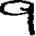

In [9]:
img = Image(data.imgs[500][0])
img

Need to look more into this DataLoader stuff... Seems like it main be used for minibatches?

In [10]:
loader = DataLoader(data, shuffle=True, batch_size=2)

In [11]:
loader

View the first-indexed 'data'

In [12]:
data[0]

(
 (0 ,.,.) = 
   1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
   0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
   0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
            ...             ⋱             ...          
   1.0000  0.9804  1.0000  ...   0.9961  0.9961  0.9961
   0.9843  1.0000  0.9529  ...   0.9961  0.9961  0.9961
   0.9255  1.0000  1.0000  ...   1.0000  1.0000  1.0000
 
 (1 ,.,.) = 
   1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
   0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
   0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
            ...             ⋱             ...          
   1.0000  0.9804  1.0000  ...   0.9961  0.9961  0.9961
   0.9843  1.0000  0.9529  ...   0.9961  0.9961  0.9961
   0.9255  1.0000  1.0000  ...   1.0000  1.0000  1.0000
 
 (2 ,.,.) = 
   1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
   0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
   0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
   

It provides a RBG-H-W Tensor and a class label (following the comma)

Store the Tensor as X and the label as Y, and view for sanity check

In [13]:
x, y = data[0]
x


(0 ,.,.) = 
  1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
  0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
  0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  0.9804  1.0000  ...   0.9961  0.9961  0.9961
  0.9843  1.0000  0.9529  ...   0.9961  0.9961  0.9961
  0.9255  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(1 ,.,.) = 
  1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
  0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
  0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
           ...             ⋱             ...          
  1.0000  0.9804  1.0000  ...   0.9961  0.9961  0.9961
  0.9843  1.0000  0.9529  ...   0.9961  0.9961  0.9961
  0.9255  1.0000  1.0000  ...   1.0000  1.0000  1.0000

(2 ,.,.) = 
  1.0000  0.9647  0.9922  ...   0.9608  0.9765  0.9961
  0.9843  0.9765  1.0000  ...   0.9765  1.0000  1.0000
  0.9922  1.0000  1.0000  ...   0.9843  1.0000  1.0000
           ...            

View the image (as opposed to Tensor) representation

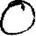

In [14]:
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(x)
img